In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = 50
x = np.linspace(-5, 5, n).reshape(-1, 1)

In [3]:
def kernel_function(a, b, parameter):
    
    dist_matrix = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    
    return np.exp(-.5 * (1/parameter) * dist_matrix)

In [4]:
param = 0.1
K_ss = kernel_function(x, x, param)

In [5]:
L_prior = np.linalg.cholesky(K_ss + 1e-15*np.eye(n))
f_prior = np.dot(L_prior, np.random.normal(size=(n,3)))

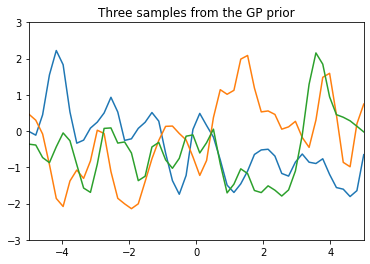

In [6]:
plt.plot(x, f_prior)
plt.axis([-5, 5, -3, 3])
plt.title('Three samples from the GP prior')
plt.show()

In [7]:
x_train = np.array([-4, -3, -2, -1, 1]).reshape(-1, 1)
y_train = np.sin(x_train)

In [8]:
K = kernel_function(x_train, x_train, param)
L = np.linalg.cholesky(K + 0.00005 * np.eye(len(x_train)))

In [9]:
K_s = kernel_function(x_train, x, param)
Lk = np.linalg.solve(L, K_s)
mu = np.dot(Lk.T, np.linalg.solve(L, y_train)).reshape((n,))

In [10]:
s2 = np.diag(K_ss) - np.sum(Lk**2, axis=0)
std_v = np.sqrt(s2)

In [11]:
L_ss = np.linalg.cholesky(K_ss + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
f_posterior = mu.reshape(-1, 1) + np.dot(L_ss, np.random.normal(size=(n,3)))

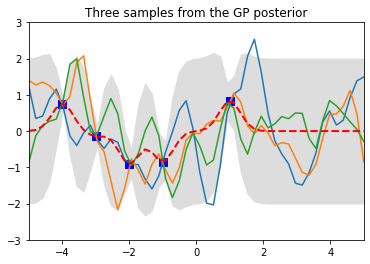

In [12]:
plt.plot(x_train, y_train, 'bs', ms=8)
plt.plot(x, f_posterior)
plt.gca().fill_between(x.flat, mu-2*std_v, mu+2*std_v, color='#dddddd')
plt.plot(x, mu, 'r--', lw=2)
plt.axis([-5, 5, -3, 3])
plt.title('Three samples from the GP posterior')
plt.show()